<a href="https://colab.research.google.com/github/chengulatj/XGB_for_scooter_crashes/blob/main/XGB_SCOOTER_CRASH_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/content/drive/MyDrive/scooter_crashes_cleaned2.0.csv')

In [3]:
# Preparing data for buffer distance 250 ft
features_250 = df.drop(columns=[col for col in df.columns if 'BUFF' in col and col != 'BUFF_250'] + ['scooter'])
target_250 = df['scooter']

features_250 = features_250.drop(columns=['BUFF_250'])
features_250 = features_250.drop(columns=['Unnamed: 0'])

# Splitting the data
X_train_250, X_test_250, y_train_250, y_test_250 = train_test_split(features_250, target_250, test_size=0.3, random_state=42)

# Initializing and training the XGBoost Model
xgb_250 = XGBClassifier(random_state=42)
xgb_250.fit(X_train_250, y_train_250)

# Making predictions and evaluating the model
predictions_250 = xgb_250.predict(X_test_250)
report_250 = classification_report(y_test_250, predictions_250)

# Calculating specificity
tn, fp, fn, tp = confusion_matrix(y_test_250, predictions_250).ravel()
specificity_250 = tn / (tn + fp)
sensitivity_250 = tp / (tp + fn)

# Output results
print(f"XGBoost Model - Buffer 250 ft:\n")
print(classification_report(y_test_250, predictions_250))
print(f"Specificity: {specificity_250:.2f}")
print(f"Sensitivity: {sensitivity_250:.2f}")


XGBoost Model - Buffer 250 ft:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2110
           1       0.47      0.25      0.32        81

    accuracy                           0.96      2191
   macro avg       0.72      0.62      0.65      2191
weighted avg       0.95      0.96      0.96      2191

Specificity: 0.99
Sensitivity: 0.25


In [31]:
features_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   junction_type       7303 non-null   int64  
 1   light_conditions    7303 non-null   int64  
 2   weather             7303 non-null   int64  
 3   road_condition      7303 non-null   int64  
 4   vehicle_type        7303 non-null   int64  
 5   vehicle_maneuver    7303 non-null   int64  
 6   adverse_weather     7303 non-null   int64  
 7   age_group           7303 non-null   int64  
 8   area_type           7303 non-null   int64  
 9   disregard_traffic   7303 non-null   int64  
 10  distracted_driving  7303 non-null   int64  
 11  horizontal_align    7303 non-null   int64  
 12  left_uturn          7303 non-null   int64  
 13  near_school         7303 non-null   int64  
 14  log_AADT            7303 non-null   float64
 15  TCD                 7303 non-null   int64  
 16  right_

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the test set
y_pred_250= xgb_250.predict(X_test_250)

# Calculating metrics
accuracy = accuracy_score(y_test_250, y_pred_250)
precision = precision_score(y_test_250, y_pred_250, average='binary')
recall = recall_score(y_test_250, y_pred_250, average='binary')
f1 = f1_score(y_test_250, y_pred_250, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.96
Precision: 0.47
Recall: 0.25
F1 Score: 0.32


In [6]:
# Selecting instances where BUFF_150 is 150 and dropping columns not needed
features_150 = df[df['BUFF_150'] == 150].drop(columns=[col for col in df.columns if 'BUFF' in col and col != 'BUFF_150'] + ['scooter'])
target_150 = df[df['BUFF_150'] == 150]['scooter']

# Removing the 'BUFF_150' column from the features dataset
features_150 = features_150.drop(columns=['BUFF_150'])
features_150 = features_150.drop(columns=['Unnamed: 0'])

# Splitting the data
X_train_150, X_test_150, y_train_150, y_test_150 = train_test_split(features_150, target_150, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
xgb_150 = XGBClassifier(random_state=42)
xgb_150.fit(X_train_150, y_train_150)

# Make predictions and evaluate the model
predictions_150 = xgb_150.predict(X_test_150)
report_150 = classification_report(y_test_150, predictions_150)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test_150, predictions_150).ravel()
specificity_150 = tn / (tn + fp)
sensitivity_150 = tp / (tp + fn)

# Output results
print(f"XGBoost Model - Buffer 150 ft:\n")
print(classification_report(y_test_150, predictions_150))
print(f"Specificity: {specificity_150:.2f}")
print(f"Sensitivity: {sensitivity_150:.2f}")

XGBoost Model - Buffer 150 ft:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1711
           1       0.40      0.28      0.33        81

    accuracy                           0.95      1792
   macro avg       0.68      0.63      0.65      1792
weighted avg       0.94      0.95      0.94      1792

Specificity: 0.98
Sensitivity: 0.28


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the test set
y_pred_150 = xgb_150.predict(X_test_150)

# Calculate metrics
accuracy = accuracy_score(y_test_150, y_pred_150)
precision = precision_score(y_test_150, y_pred_150, average='binary')
recall = recall_score(y_test_150, y_pred_150, average='binary')
f1 = f1_score(y_test_150, y_pred_150, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.40
Recall: 0.28
F1 Score: 0.33


In [8]:
# Selecting instances where BUFF_100 is 100 and dropping columns not needed
features_100 = df[df['BUFF_100'] == 100].drop(columns=[col for col in df.columns if 'BUFF' in col and col != 'BUFF_100'] + ['scooter'])
target_100 = df[df['BUFF_100'] == 100]['scooter']

# Removing the 'BUFF_150' column from the features dataset
features_100 = features_100.drop(columns=['BUFF_100'])
features_100 = features_100.drop(columns=['Unnamed: 0'])

# Splitting the data
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(features_100, target_100, test_size=0.3, random_state=42)

# Initializing and training the model
xgb_100 = XGBClassifier(random_state=42)
xgb_100.fit(X_train_100, y_train_100)

# Making predictions and evaluating the model
predictions_100 = xgb_100.predict(X_test_100)
report_100 = classification_report(y_test_100, predictions_100)

# Calculating specificity
tn, fp, fn, tp = confusion_matrix(y_test_100, predictions_100).ravel()
specificity_100 = tn / (tn + fp)
sensitivity_100 = tp / (tp + fn)

# Output results
print(f"XGBoost Model- Buffer 100 ft:\n")
print(classification_report(y_test_100, predictions_100))
print(f"Specificity: {specificity_100:.2f}")
print(f"Sensitivity: {sensitivity_100:.2f}")

XGBoost Model- Buffer 100 ft:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1419
           1       0.48      0.35      0.41        79

    accuracy                           0.95      1498
   macro avg       0.72      0.67      0.69      1498
weighted avg       0.94      0.95      0.94      1498

Specificity: 0.98
Sensitivity: 0.35


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on the test set
y_pred_100 = xgb_100.predict(X_test_100)

# Calculate metrics
accuracy = accuracy_score(y_test_100, y_pred_100)
precision = precision_score(y_test_100, y_pred_100, average='binary')
recall = recall_score(y_test_100, y_pred_100, average='binary')
f1 = f1_score(y_test_100, y_pred_100, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.48
Recall: 0.35
F1 Score: 0.41


In [10]:
# Selecting instances where BUFF_50 is 50 and dropping columns not needed
features_50 = df[df['BUFF_50'] == 50].drop(columns=[col for col in df.columns if 'BUFF' in col and col != 'BUFF_50'] + ['scooter'])
target_50 = df[df['BUFF_50'] == 50]['scooter']

# Removing the 'BUFF_150' column from the features dataset
features_50 = features_50.drop(columns=['BUFF_50'])
features_50 = features_50.drop(columns=['Unnamed: 0'])

# Splitting the data
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(features_50, target_50, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
xgb_50 = XGBClassifier(random_state=42)
xgb_50.fit(X_train_50, y_train_50)

# Make predictions and evaluate the model
predictions_50 = xgb_50.predict(X_test_50)
report_50 = classification_report(y_test_50, predictions_50)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test_50, predictions_50).ravel()
specificity_50 = tn / (tn + fp)
sensitivity_50 = tp / (tp + fn)

# Output results
print(f"XGBoost Model - Buffer 50 ft:\n")
print(classification_report(y_test_50, predictions_50))
print(f"Specificity: {specificity_50:.2f}")
print(f"Sensitivity: {sensitivity_50:.2f}")

XGBoost Model - Buffer 50 ft:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       863
           1       0.61      0.51      0.55        83

    accuracy                           0.93       946
   macro avg       0.78      0.74      0.76       946
weighted avg       0.92      0.93      0.93       946

Specificity: 0.97
Sensitivity: 0.51


In [11]:
# Selecting instances where BUFF_25 is 25 and dropping columns not needed
features_25 = df[df['BUFF_25'] == 25].drop(columns=[col for col in df.columns if 'BUFF' in col and col != 'BUFF_25'] + ['scooter'])
target_25 = df[df['BUFF_25'] == 25]['scooter']

# Removing the 'BUFF_150' column from the features dataset
features_25 = features_25.drop(columns=['BUFF_25'])
features_25 = features_25.drop(columns=['Unnamed: 0'])

# Splitting the data
X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(features_25, target_25, test_size=0.3, random_state=42)

# Initializing and training the model
xgb_25= XGBClassifier(random_state=42)
xgb_25.fit(X_train_25, y_train_25)

# Making predictions and evaluating the model
predictions_25 =xgb_25.predict(X_test_25)
report_25 = classification_report(y_test_25, predictions_25)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test_25, predictions_25).ravel()
specificity_25 = tn / (tn + fp)
sensitivity_25 = tp / (tp + fn)

# Output results
print(f"Random Forest Model - Buffer 25 ft:\n")
print(classification_report(y_test_25, predictions_25))
print(f"Specificity: {specificity_25:.2f}")
print(f"Sensitivity: {sensitivity_25:.2f}")

Random Forest Model - Buffer 25 ft:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       455
           1       0.74      0.61      0.67        80

    accuracy                           0.91       535
   macro avg       0.84      0.79      0.81       535
weighted avg       0.91      0.91      0.91       535

Specificity: 0.96
Sensitivity: 0.61


In [12]:
# Selecting instances where BUFF_10 is 10 and dropping columns not needed
features_10 = df[df['BUFF_10'] == 10].drop(columns=[col for col in df.columns if 'BUFF' in col and col != 'BUFF_10'] + ['scooter'])
target_10 = df[df['BUFF_10'] == 10]['scooter']

# Removing the 'BUFF_150' column from the features dataset
features_10 = features_10.drop(columns=['BUFF_10'])
features_10 = features_10.drop(columns=['Unnamed: 0'])

# Splitting the data
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(features_10, target_10, test_size=0.3, random_state=42)

# Initializing and training the model
xgb_10 = XGBClassifier(random_state=42)
xgb_10.fit(X_train_10, y_train_10)

# Making predictions and evaluating the model
predictions_10 = xgb_10.predict(X_test_10)
report_10 = classification_report(y_test_10, predictions_10)

# Calculating specificity
tn, fp, fn, tp = confusion_matrix(y_test_10, predictions_10).ravel()
specificity_10 = tn / (tn + fp)
sensitivity_10 = tp / (tp + fn)

# Output results
print(f"XGBoost Model - Buffer 10 ft:\n")
print(classification_report(y_test_10, predictions_10))
print(f"Specificity: {specificity_10:.2f}")
print(f"Sensitivity: {sensitivity_10:.2f}")

XGBoost Model - Buffer 10 ft:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       144
           1       0.82      0.78      0.80        77

    accuracy                           0.86       221
   macro avg       0.85      0.84      0.85       221
weighted avg       0.86      0.86      0.86       221

Specificity: 0.91
Sensitivity: 0.78


In [13]:
# Selecting instances where BUFF_5 is 5 and dropping columns not needed
features_5 = df[df['BUFF_5'] == 5].drop(columns=[col for col in df.columns if 'BUFF' in col and col != 'BUFF_5'] + ['scooter'])
target_5 = df[df['BUFF_5'] == 5]['scooter']

# Removing the 'BUFF_150' column from the features dataset
features_5 = features_5.drop(columns=['BUFF_5'])
features_5 = features_5.drop(columns=['Unnamed: 0'])

# Splitting the data
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(features_5, target_5, test_size=0.3, random_state=42)

#Initializing and training the model
xgb_5 = XGBClassifier(random_state=42)
xgb_5.fit(X_train_5, y_train_5 )

# Make predictions and evaluate the model
predictions_5 = xgb_5.predict(X_test_5)
report_5 = classification_report(y_test_5, predictions_5)

# Calculating specificity
tn, fp, fn, tp = confusion_matrix(y_test_5, predictions_5).ravel()
specificity_5 = tn / (tn + fp)
sensitivity_5 = tp / (tp + fn)

# Output results
print(f"XGBoost Model - Buffer 5 ft:\n")
print(classification_report(y_test_5, predictions_5))
print(f"Specificity: {specificity_5:.2f}")
print(f"Sensitivity: {sensitivity_5:.2f}")

XGBoost Model - Buffer 5 ft:

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        74
           1       0.90      0.96      0.93        79

    accuracy                           0.93       153
   macro avg       0.93      0.93      0.93       153
weighted avg       0.93      0.93      0.93       153

Specificity: 0.89
Sensitivity: 0.96


In [34]:
features_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509 entries, 3 to 7302
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   junction_type       509 non-null    int64  
 1   light_conditions    509 non-null    int64  
 2   weather             509 non-null    int64  
 3   road_condition      509 non-null    int64  
 4   vehicle_type        509 non-null    int64  
 5   vehicle_maneuver    509 non-null    int64  
 6   adverse_weather     509 non-null    int64  
 7   age_group           509 non-null    int64  
 8   area_type           509 non-null    int64  
 9   disregard_traffic   509 non-null    int64  
 10  distracted_driving  509 non-null    int64  
 11  horizontal_align    509 non-null    int64  
 12  left_uturn          509 non-null    int64  
 13  near_school         509 non-null    int64  
 14  log_AADT            509 non-null    float64
 15  TCD                 509 non-null    int64  
 16  right_turn  

In [14]:
import matplotlib.pyplot as plt

In [15]:
!pip install shap

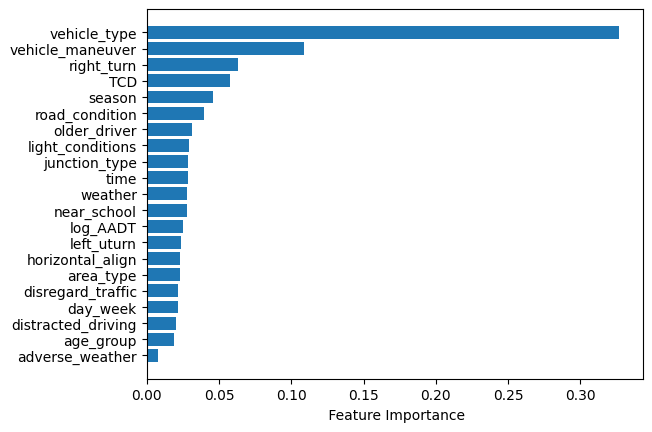

In [16]:
# Feature Importance Plot
xgb_importances = xgb_250.feature_importances_
sorted_idx = xgb_importances.argsort()
plt.barh(features_250.columns[sorted_idx], xgb_importances[sorted_idx])
plt.xlabel(" Feature Importance")
plt.show()

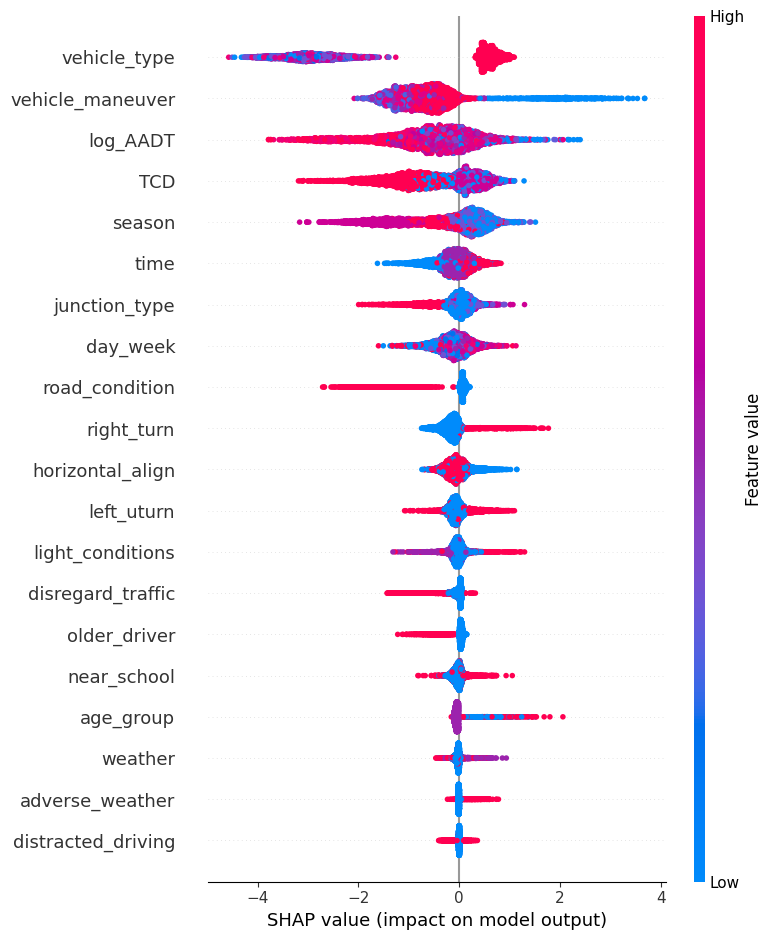

In [17]:
import shap

# SHAP Values
explainer = shap.Explainer(xgb_250)
shap_values = explainer.shap_values(X_train_250)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_250)

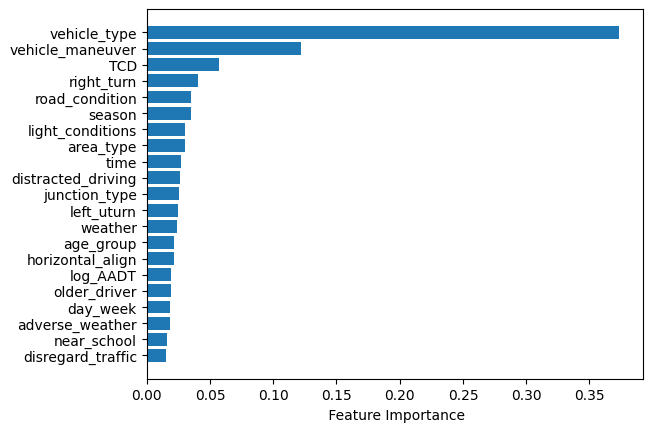

In [18]:
# Feature Importance Plot
xgb_importances = xgb_150.feature_importances_
sorted_idx = xgb_importances.argsort()
plt.barh(features_150.columns[sorted_idx], xgb_importances[sorted_idx])
plt.xlabel(" Feature Importance")
plt.show()

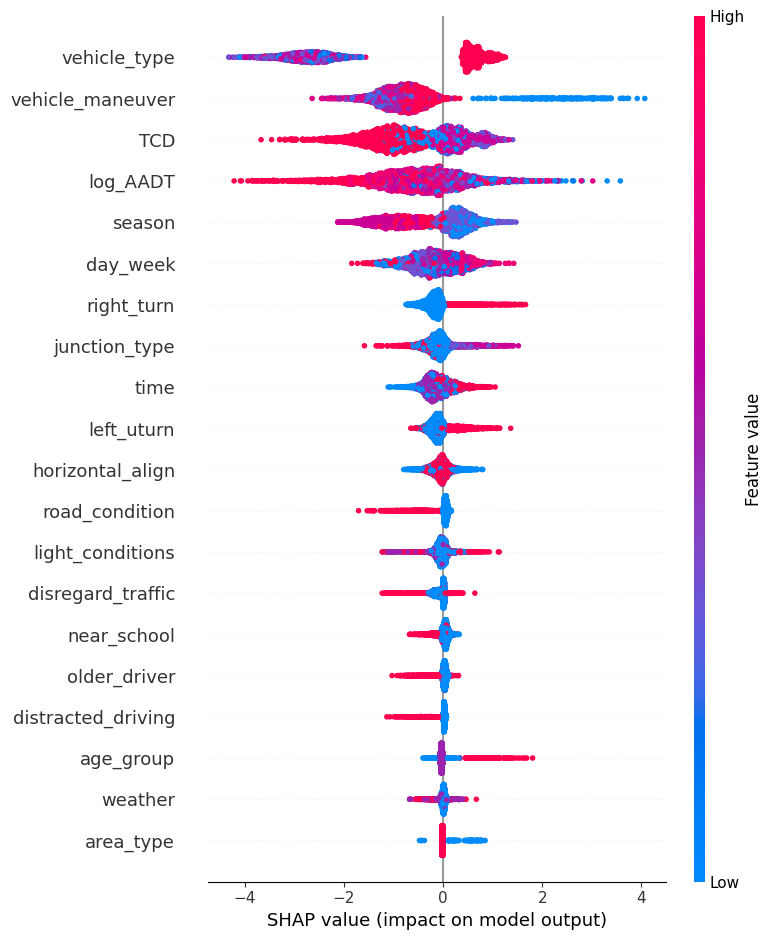

In [19]:
import shap

# SHAP Values
explainer = shap.Explainer(xgb_150)
shap_values = explainer.shap_values(X_train_150)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_150)

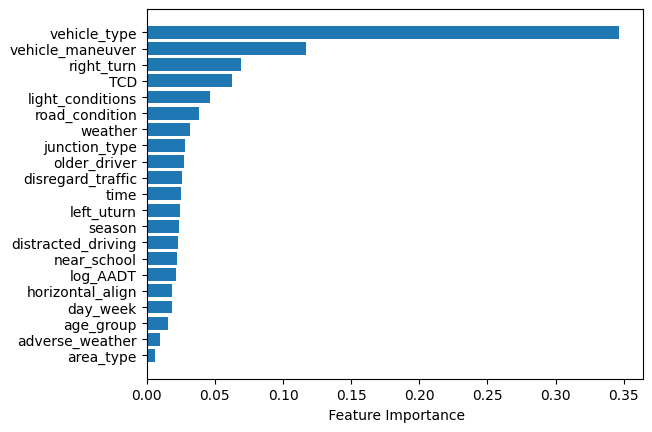

In [20]:
# Feature Importance Plot
xgb_importances = xgb_100.feature_importances_
sorted_idx = xgb_importances.argsort()
plt.barh(features_100.columns[sorted_idx], xgb_importances[sorted_idx])
plt.xlabel(" Feature Importance")
plt.show()

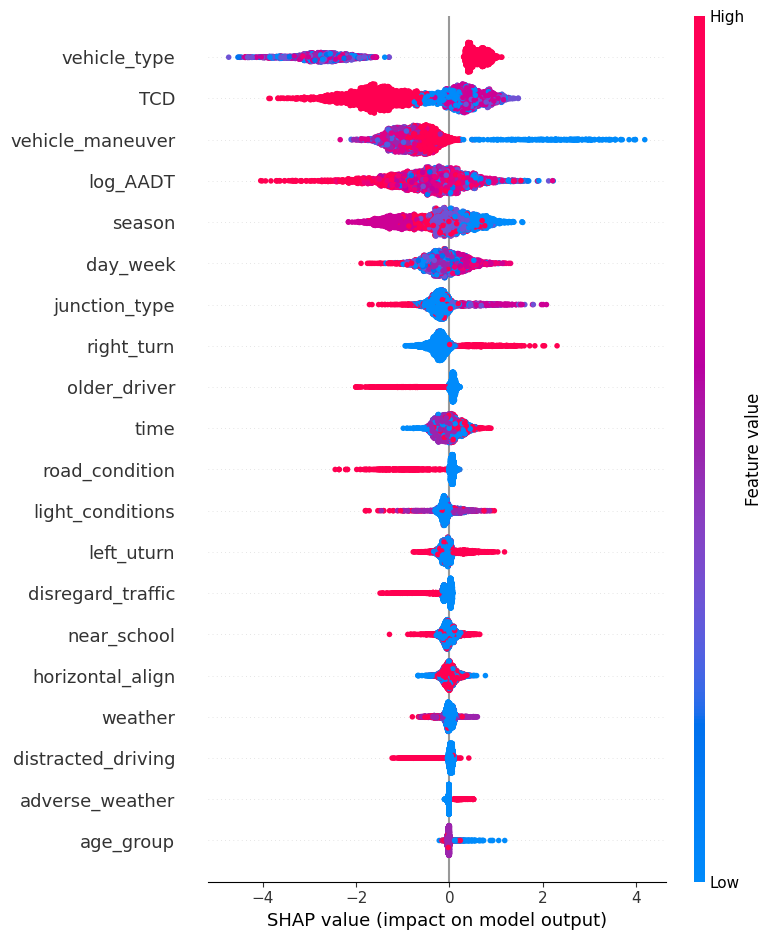

In [21]:
import shap

# SHAP Values
explainer = shap.Explainer(xgb_100)
shap_values = explainer.shap_values(X_train_100)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_100)

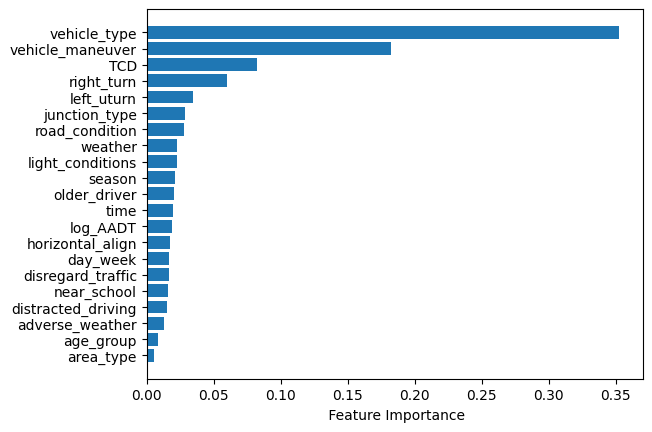

In [22]:
# Feature Importance Plot
xgb_importances =xgb_50.feature_importances_
sorted_idx = xgb_importances.argsort()
plt.barh(features_50.columns[sorted_idx], xgb_importances[sorted_idx])
plt.xlabel(" Feature Importance")
plt.show()

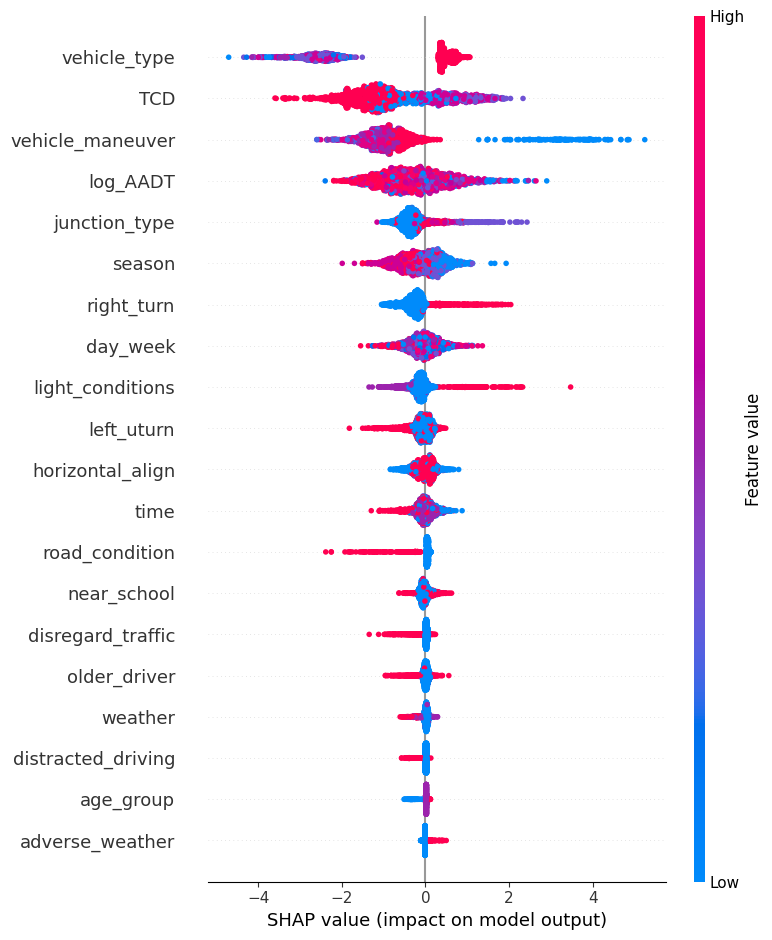

In [23]:
import shap

# SHAP Values
explainer = shap.Explainer(xgb_50)
shap_values = explainer.shap_values(X_train_50)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_50)

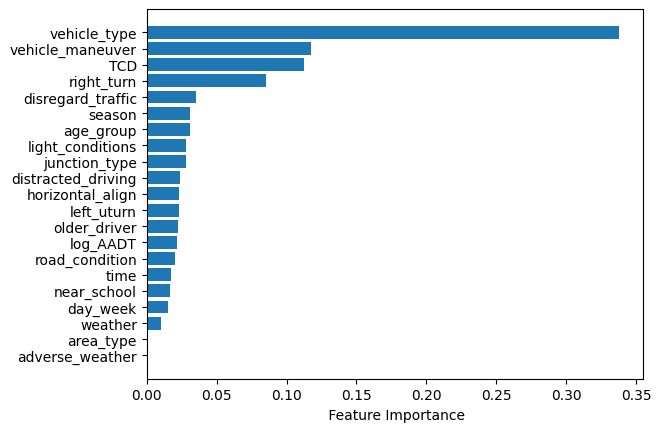

In [24]:
# Feature Importance Plot
xgb_importances = xgb_25.feature_importances_
sorted_idx = xgb_importances.argsort()
plt.barh(features_25.columns[sorted_idx], xgb_importances[sorted_idx])
plt.xlabel(" Feature Importance")
plt.show()

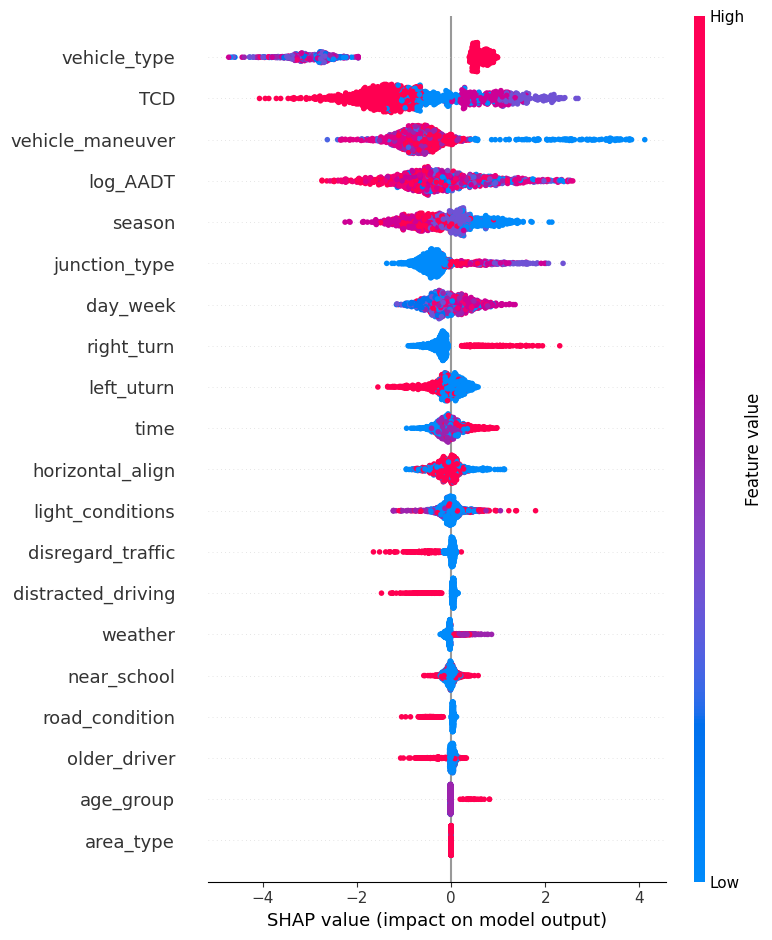

In [25]:
import shap

# SHAP Values
explainer = shap.Explainer(xgb_25)
shap_values = explainer.shap_values(X_train_25)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_25)

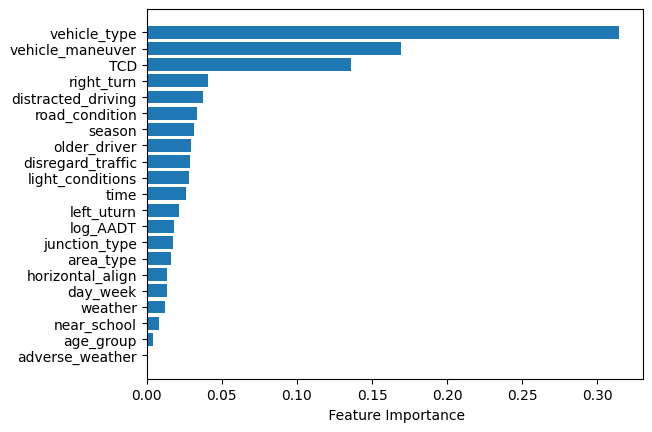

In [26]:
# Feature Importance Plot
xgb_importances = xgb_10.feature_importances_
sorted_idx = xgb_importances.argsort()
plt.barh(features_10.columns[sorted_idx], xgb_importances[sorted_idx])
plt.xlabel(" Feature Importance")
plt.show()

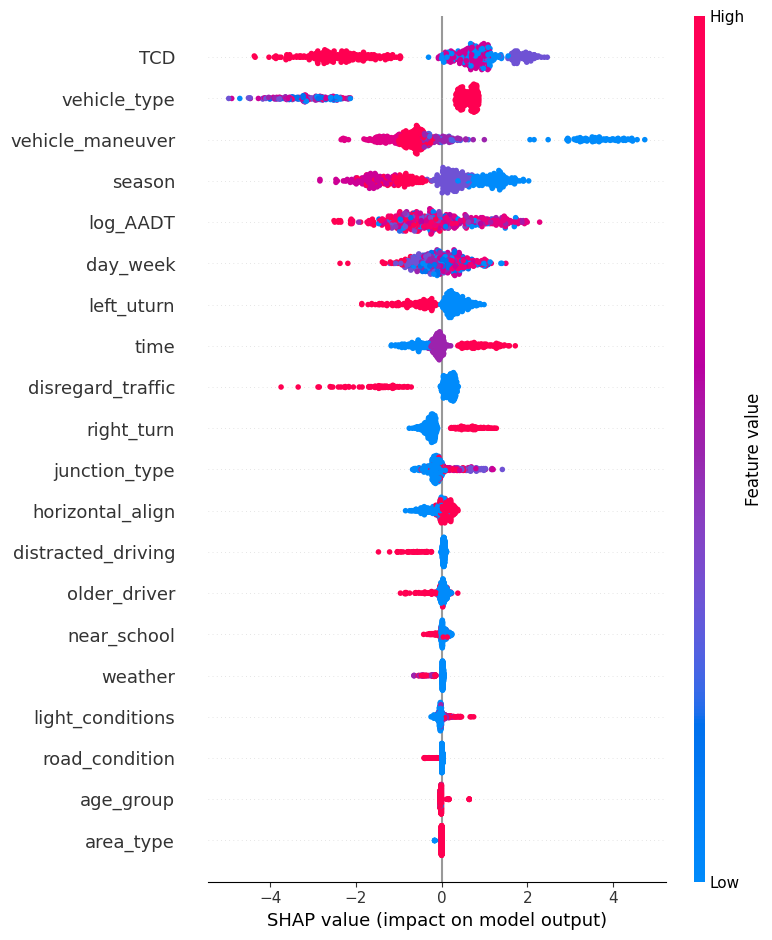

In [27]:
import shap

# SHAP Values
explainer = shap.Explainer(xgb_10)
shap_values = explainer.shap_values(X_train_10)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_10)

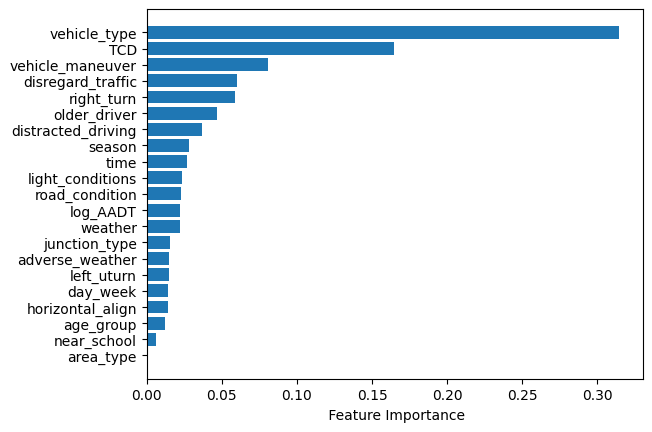

In [29]:
# Feature Importance Plot
xgb_importances = xgb_5.feature_importances_
sorted_idx = xgb_importances.argsort()
plt.barh(features_5.columns[sorted_idx], xgb_importances[sorted_idx])
plt.xlabel(" Feature Importance")
plt.show()

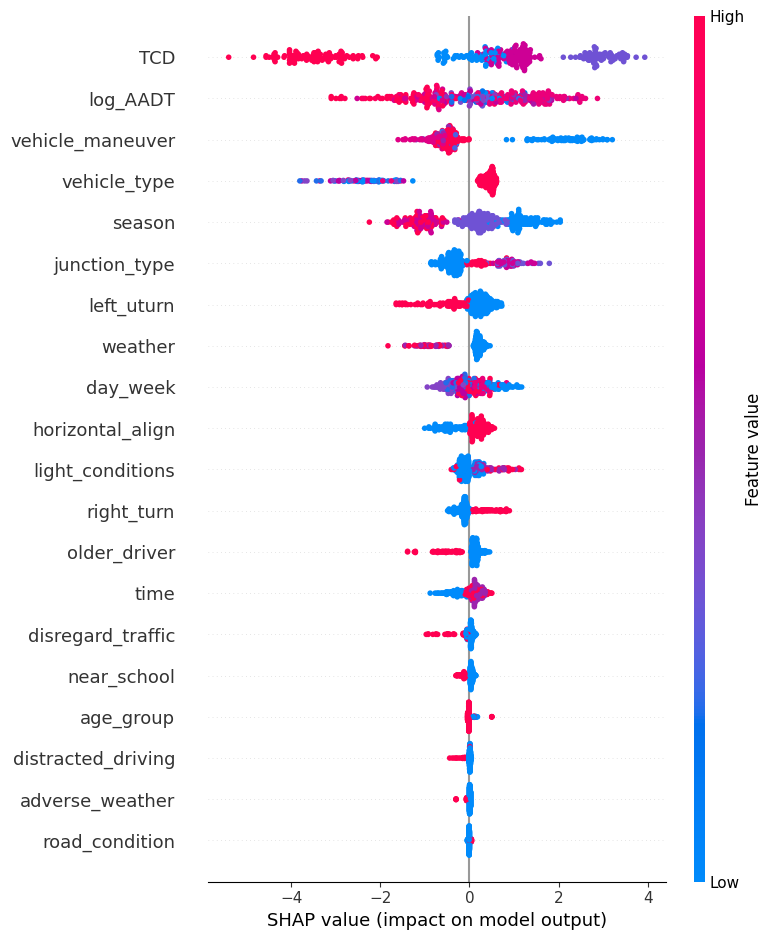

In [30]:
import shap

# SHAP Values
explainer = shap.Explainer(xgb_5)
shap_values = explainer.shap_values(X_train_5)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train_5)